# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [117]:
# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load =os.path.join("Resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [116]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [20]:
#  1. Get the total rides for each city type
total_rides_ctypes=pyber_data_df.groupby(pyber_data_df['type']).count()['ride_id']
total_rides_ctypes

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [21]:
# 2. Get the total drivers for each city type
total_driver_ctype=city_data_df.groupby(city_data_df['type']).sum()['driver_count']
total_driver_ctype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [22]:
#  3. Get the total amount of fares for each city type
total_fare_ctypes=pyber_data_df.groupby(pyber_data_df['type']).sum()['fare']
total_fare_ctypes

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [23]:
#  4. Get the average fare per ride for each city type. 
avg_fares_ctypes=pyber_data_df.groupby(pyber_data_df['type']).mean()['fare']
avg_fares_ctypes

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [25]:
#The same but dividing the variables
avg_fare_ctypes=total_fare_ctypes/total_rides_ctypes
avg_fare_ctypes

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [27]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver=total_fare_ctypes/total_driver_ctype
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [32]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
    'Total Rides':total_rides_ctypes,
    'Total Drivers':total_driver_ctype,
    'Total Fares':total_fare_ctypes,
    'Average Fare per Ride':avg_fare_ctypes,
    'Average Fare per Driver':avg_fare_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [33]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [35]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [36]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


In [50]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_per_date_df=pyber_data_df.groupby(['type','date']).sum()[['fare']]
fares_per_date_df.head(10)

fare
type  date                   
Rural 01/01/2019 09:45  43.69
      01/02/2019 08:59  17.05
      01/04/2019 09:32  21.63
      01/04/2019 13:39  26.73
      01/04/2019 16:37  54.65
      01/05/2019 08:14  22.44
      02/01/2019 11:18  52.12
      02/02/2019 06:28  53.07
      02/02/2019 14:54  12.42
      02/03/2019 21:04  20.99

In [51]:
# 3. Reset the index on the DataFrame you created in #2. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_per_date_df=fares_per_date_df.reset_index()
fares_per_date_df

,type,date,fare
0,Rural,01/01/2019 09:45,43.69
1,Rural,01/02/2019 08:59,17.05
2,Rural,01/04/2019 09:32,21.63
3,Rural,01/04/2019 13:39,26.73
4,Rural,01/04/2019 16:37,54.65
...,...,...,...
2359,Urban,31/03/2019 11:49,24.16
2360,Urban,31/03/2019 13:58,29.41
2361,Urban,31/03/2019 14:58,7.67
2362,Urban,31/03/2019 15:22,30.77


In [194]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_per_date_pivot=fares_per_date_df.pivot(index='date',columns='type',values='fare')
fares_per_date_pivot

type,Rural,Suburban,Urban
date,,,
01/01/2019 00:08,NaN,NaN,37.91
01/01/2019 00:46,NaN,47.74,NaN
01/01/2019 02:07,NaN,24.07,NaN
01/01/2019 03:46,NaN,NaN,7.57
01/01/2019 05:23,NaN,NaN,10.75
...,...,...,...
31/03/2019 11:49,NaN,NaN,24.16
31/03/2019 13:58,NaN,NaN,29.41
31/03/2019 14:58,NaN,NaN,7.67


In [224]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# T1_fare_per_date=fares_per_date_pivot.loc[fares_per_date_pivot[0]=='01/01/2019 00:08':'29/04/2019 23:10']
# T1_fare_per_date
T12019_fares_df=fares_per_date_pivot.loc['01/01/2019':'28/04/2019']
T12019_fares_df

type,Rural,Suburban,Urban
date,,,
01/01/2019 00:08,NaN,NaN,37.91
01/01/2019 00:46,NaN,47.74,NaN
01/01/2019 02:07,NaN,24.07,NaN
01/01/2019 03:46,NaN,NaN,7.57
01/01/2019 05:23,NaN,NaN,10.75
...,...,...,...
28/03/2019 15:00,NaN,NaN,35.88
28/03/2019 18:03,NaN,NaN,42.75
28/03/2019 19:16,NaN,34.03,NaN


In [228]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
T12019_fares_df.index=pd.to_datetime(T12019_fares_df.index, dayfirst=True)

In [227]:
# 7. Check that the datatype for the index is datetime using df.info()
T12019_fares_df.tail(100)


type,Rural,Suburban,Urban
date,,,
2019-03-27 09:35:00,NaN,34.54,NaN
2019-03-27 09:44:00,NaN,NaN,33.40
2019-03-27 11:50:00,NaN,NaN,22.64
2019-03-27 11:55:00,NaN,28.80,NaN
2019-03-27 11:56:00,NaN,NaN,15.64
...,...,...,...
2019-03-28 15:00:00,NaN,NaN,35.88
2019-03-28 18:03:00,NaN,NaN,42.75
2019-03-28 19:16:00,NaN,34.03,NaN


In [229]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
types_fares_sum_weekly=T12019_fares_df.resample('W').sum()
types_fares_sum_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,165.59,652.78,1058.55
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


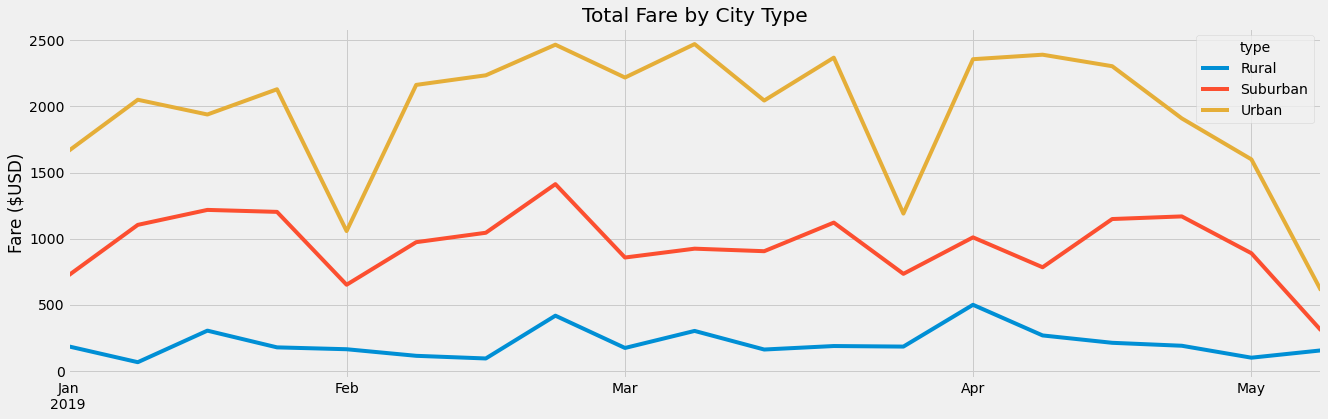

In [230]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.

types_fares_sum_weekly.plot(figsize=(20,6))

plt.title('Total Fare by City Type')
plt.ylabel('Fare ($USD)')
plt.xlabel('')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig('analysis\PyBer_fare_summary.png')
plt.show()
